In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
passagers = pd.read_csv('passagers.csv')
position_gps = pd.read_csv('position gps des stations de métro.csv')
plan_metro = pd.read_csv('plan du métro.csv')

In [4]:
position_gps = position_gps.drop_duplicates('Station')

In [5]:
len(position_gps)

261

In [10]:
position_gps

,Station,GPS
0,Boucicaut,"48.84109405724891, 2.287945766487378"
1,Bourse,"48.86865415183625, 2.3413760511435733"
2,Bir-Hakeim,"48.85394260621378, 2.2893345327788075"
3,Argentine,"48.87533684211653, 2.2901275088247015"
4,Daumesnil,"48.83954964556868, 2.3957032894363937"
...,...,...
369,Église de Pantin,"48.893149985759834, 2.412763044547627"
370,Château d'Eau,"48.87262083992817, 2.356153947450339"
372,Guy Môquet,"48.892206827747096, 2.3272198679191285"
373,Monceau,"48.88032518647405, 2.308773835955807"


In [20]:
# Créer un graphe orienté ou non orienté
G = nx.DiGraph()  # Si vous voulez un graphe orienté

# Ajouter les arêtes avec les stations et les lignes comme informations
for _, row in plan_metro.iterrows():
    ligne_de = row['de Ligne']
    station_de = row['de Station']
    ligne_vers = row['vers Ligne']
    station_vers = row['vers Station']

    if station_de != station_vers:
        # Ajouter une arête avec un attribut de ligne
        G.add_edge(station_de, station_vers, ligne=f"{ligne_de}-{ligne_vers}")

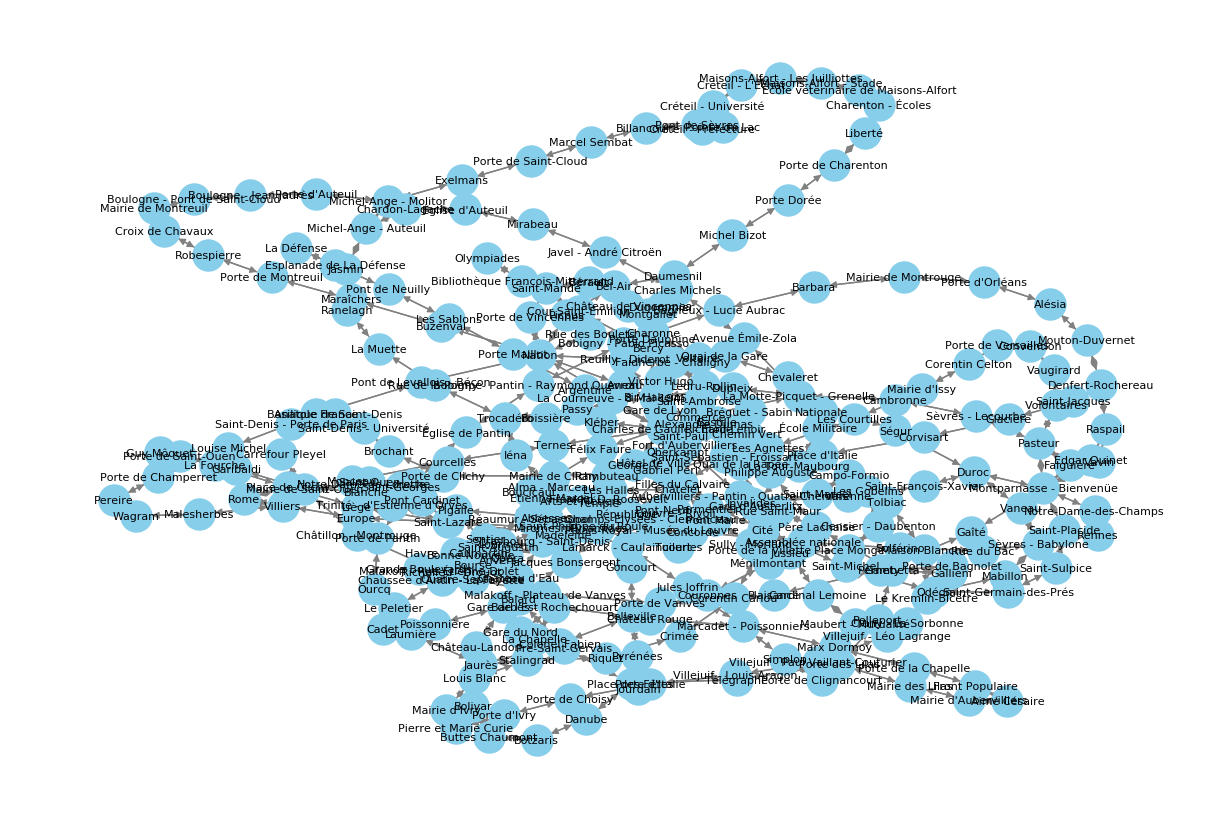

In [21]:
# Visualisation basique
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Positionnement des nœuds
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=500, edge_color="gray", font_size=8)
plt.show()

In [31]:
import math

#On calcule la distance avec la formule de Haversine
def calcul_distance(station1, station2):
    coord_station1 = position_gps.loc[position_gps["Station"] == station1, "GPS"].iloc[0]
    coord_station2 = position_gps.loc[position_gps["Station"] == station2, "GPS"].iloc[0]
    lat1 , lon1 = map(float, coord_station1.split(", "))
    lat2 , lon2 = map(float, coord_station2.split(", "))
    # Rayon de la Terre en kilomètres
    R = 6371.0
    
    # Convertir les degrés en radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Différences
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Formule de Haversine
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.asin(math.sqrt(a))
    
    # Distance
    distance = R * c
    return distance

def calcul_temps(station1,station2,vitesse):
    return round(calcul_distance(station1,station2)/vitesse*3600)

In [33]:
#République, Porte de Clignancourt
print(calcul_distance('Porte Dauphine','Victor Hugo'))
print(calcul_temps('Porte Dauphine','Victor Hugo',25.1))

0.7843077221583116
112


In [ ]:
len(position_gps)